## MNIST 분류기 모델 작성
1. dataload(dataset, dataloader)
1. model layer 만들기 
1. 학습코드(earlystopping)
1. tensorboard 기록

In [30]:
from data import load_dataset, CustomDataset, get_dataloader
from matplotlib import pyplot as plt
from train import EarlyStopping, running_loop,test_model
from model import ResNet50, Base
import numpy as np
from torch import nn
import torch
import random

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#model define
model_original=Base()
model_canny=Base()
model_contrav=Base()

#model put into gpu
model_original=model_original.to(device)
model_canny=model_canny.to(device)
model_contrav=model_contrav.to(device)

#get orginal dataset
tr,val,test=load_dataset()

Using cuda device


## 1번 데이터셋: 노말 데이터

In [3]:
dataloaders_original=[]
for dataset in [tr,val,test]:
    dataloaders_original.append(get_dataloader(dataset))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


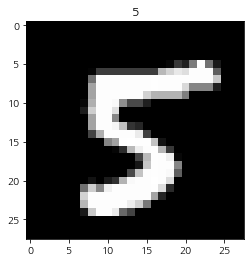

In [4]:
train_features, train_labels = next(iter(dataloaders_original[0]))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[32].permute(1,2,0)
label = train_labels[32]
plt.title(label.item())
plt.imshow(img, cmap="gray")
plt.show()

## 2번 데이터셋: canny edge

In [5]:
dataloaders_canny=[]
for dataset in [tr,val,test]:
    dataset_canny=CustomDataset(dataset, 'canny')
    dataloaders_canny.append(get_dataloader(dataset_canny))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


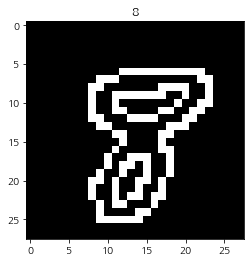

In [6]:
train_features, train_labels = next(iter(dataloaders_canny[0]))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[32].permute(1,2,0)
label = train_labels[32]
plt.title(label.item())
plt.imshow(img, cmap="gray")
plt.show()

## 3번 데이터셋: 반전

In [7]:
dataloaders_contrav=[]
for dataset in [tr,val,test]:
    dataset_contrav=CustomDataset(dataset, 'contraversion')
    dataloaders_contrav.append(get_dataloader(dataset_contrav))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


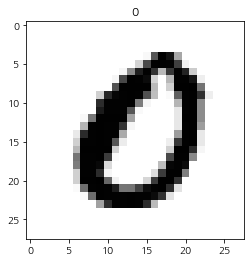

In [8]:
train_features, train_labels = next(iter(dataloaders_contrav[0]))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[32].permute(1,2,0)
label = train_labels[32]
plt.title(label.item())
plt.imshow(img, cmap="gray")
plt.show()

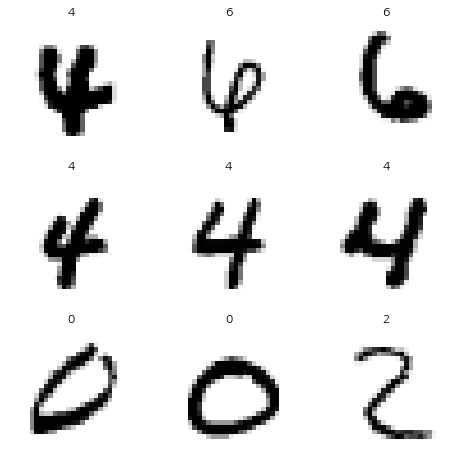

In [9]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(0, cols * rows ):
    sample_idx = torch.randint(len(dataset_contrav), size=(1,)).item()
    img, label = dataset_contrav[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [10]:
#define how much epoches to run
epoches = 2

# loss function
loss_fn = nn.CrossEntropyLoss() 

# optimizer
optimizer1 = torch.optim.Adam(model_original.parameters(), lr=1e-3) 
optimizer2 = torch.optim.Adam(model_canny.parameters(), lr=1e-3) 
optimizer3 = torch.optim.Adam(model_contrav.parameters(), lr=1e-3)

In [11]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint1/checkpoint.pt')
loss_list1= []
acc_list1=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_original[0],device,optimizer1,model_original,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_original[1],device,optimizer1,model_original,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_original)
    loss_list1.append(val_loss)
    acc_list1.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:10<00:00, 72.86it/s]


1: loss=3.8236483931541444e-05, accuracy=0.9401666666666667


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 110.89it/s]


1: val_loss=0.0007831900519259433, val_accuracy=0.978
Validation loss decreased (inf --> 0.000783).  Saving model ...
epoch: 2


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:09<00:00, 76.73it/s]


2: loss=3.699595232804616e-05, accuracy=0.9817083333333333


100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 110.91it/s]

2: val_loss=0.00020602743755629722, val_accuracy=0.9813333333333333
Validation loss decreased (0.000783 --> 0.000206).  Saving model ...
DONE


In [12]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint2/checkpoint.pt')
loss_list2= []
acc_list2=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_canny[0],device, optimizer2, model_canny,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_canny[1],device, optimizer2, model_canny,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_canny)
    
    loss_list2.append(val_loss)
    acc_list2.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:22<00:00, 32.62it/s]


1: loss=0.0002555156151453654, accuracy=0.9296458333333333


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [00:05<00:00, 37.23it/s]


1: val_loss=0.0013626387461702875, val_accuracy=0.97525
Validation loss decreased (inf --> 0.001363).  Saving model ...
epoch: 2


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:22<00:00, 33.91it/s]


2: loss=0.00013671692212422688, accuracy=0.9766666666666667


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [00:05<00:00, 36.98it/s]

2: val_loss=0.0003981223686578426, val_accuracy=0.9788333333333333
Validation loss decreased (0.001363 --> 0.000398).  Saving model ...
DONE


In [13]:
early_stopping = EarlyStopping(patience=5 ,verbose=True, path='checkpoint3/checkpoint.pt')
loss_list3= []
acc_list3=[]
for epoch in range(1, epoches+1):
    print(f"epoch: {epoch}")
    loss,acc=running_loop(dataloaders_contrav[0],device, optimizer3, model_contrav,loss_fn, True)
    print(f"{epoch}: loss={loss}, accuracy={acc}")
    
    val_loss, val_acc=running_loop(dataloaders_contrav[1],device, optimizer3, model_contrav,loss_fn, False)
    print(f"{epoch}: val_loss={val_loss}, val_accuracy={val_acc}")
    early_stopping(val_loss, model_contrav)
    
    loss_list3.append(val_loss)
    acc_list3.append(val_acc)
    
    if early_stopping.early_stop==True:
        print("Early stopping !")
        break
print("DONE")

epoch: 1


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 61.53it/s]


1: loss=7.107547422250112e-05, accuracy=0.9201666666666667


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [00:02<00:00, 77.30it/s]


1: val_loss=0.0007798926151813345, val_accuracy=0.9709166666666667
Validation loss decreased (inf --> 0.000780).  Saving model ...
epoch: 2


100%|█████████████████████████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 61.52it/s]


2: loss=4.2461355527242024e-05, accuracy=0.9774791666666667


100%|█████████████████████████████████████████████████████████████████████████████████| 188/188 [00:02<00:00, 76.09it/s]

2: val_loss=5.289150818072735e-05, val_accuracy=0.9816666666666667
Validation loss decreased (0.000780 --> 0.000053).  Saving model ...
DONE


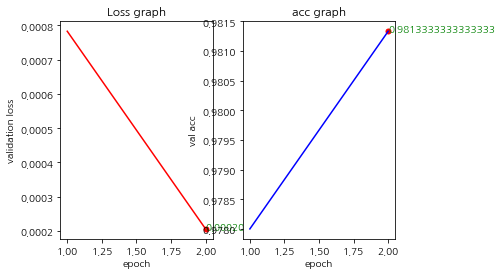

In [14]:
xrange=range(1,len(loss_list1)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list1, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list1)
plt.scatter(loss_list1.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list1.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list1, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list1)
plt.scatter(acc_list1.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list1.index(max_point)+1, max_point, max_point, c='g')
plt.show()

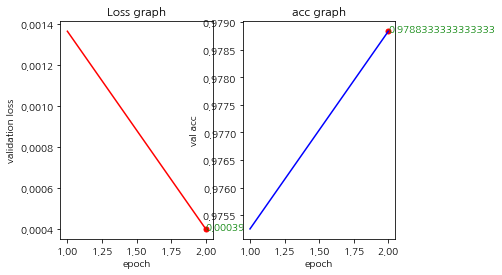

In [15]:
xrange=range(1,len(loss_list2)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list2, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list2)
plt.scatter(loss_list2.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list2.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list2, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list2)
plt.scatter(acc_list2.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list2.index(max_point)+1, max_point, max_point, c='g')
plt.show()

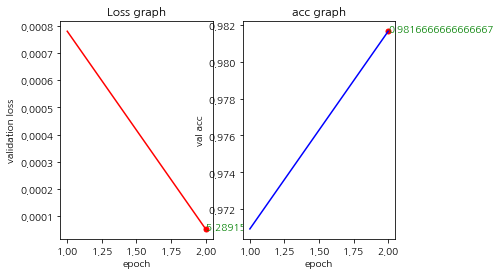

In [16]:
xrange=range(1,len(loss_list3)+1)
plt.subplot(1, 2, 1) 
plt.plot(xrange,loss_list3, "r")
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.title('Loss graph')
min_point=min(loss_list3)
plt.scatter(loss_list3.index(min_point)+1, min_point,s= 100,c='r',marker='.')
plt.text(loss_list3.index(min_point)+1, min_point, min_point, c='g')

plt.subplot(1,2,2)
plt.plot(xrange,acc_list3, "b")
plt.xlabel('epoch')
plt.ylabel('val acc')
plt.title('acc graph')
max_point=max(acc_list3)
plt.scatter(acc_list3.index(max_point)+1, max_point,s= 100,c='r',marker='.')
plt.text(acc_list3.index(max_point)+1, max_point, max_point, c='g')
plt.show()

# 평가 실험

A. 기본 조합

## 원본 데이터셋 성능평가

In [29]:
test_model(dataloaders_original[2], model_original, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.04509317936452853, 0.9849)

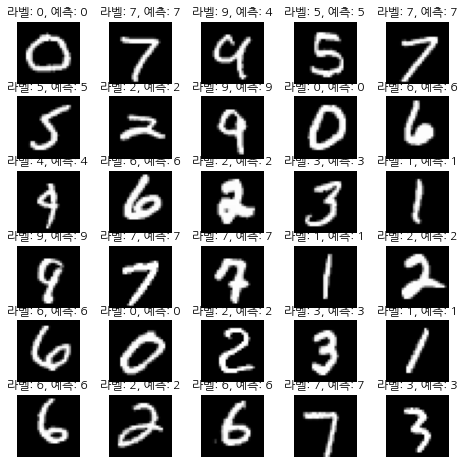

In [32]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## canny 데이터셋 모델 성능평가

In [19]:
test_model(dataloaders_canny[2], model_canny, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.05478046566194552, 0.9817)

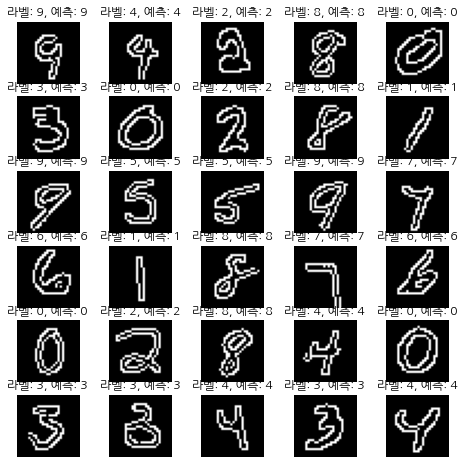

In [34]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'canny')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## contraversion 데이터셋 모델 성능평가

In [20]:
test_model(dataloaders_contrav[2], model_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.05226445430889726, 0.9829)

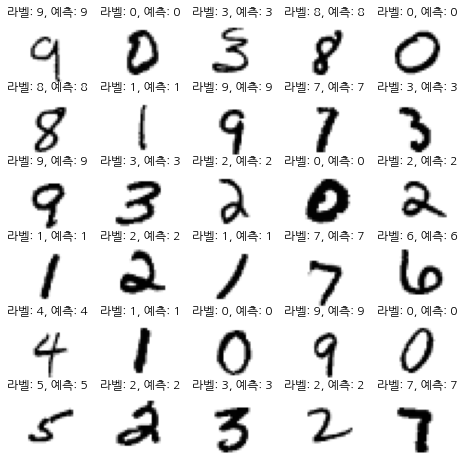

In [35]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'contraversion')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original , test: canny

In [22]:
test_model(dataloaders_canny[2], model_original, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.8258650995743503, 0.7544)

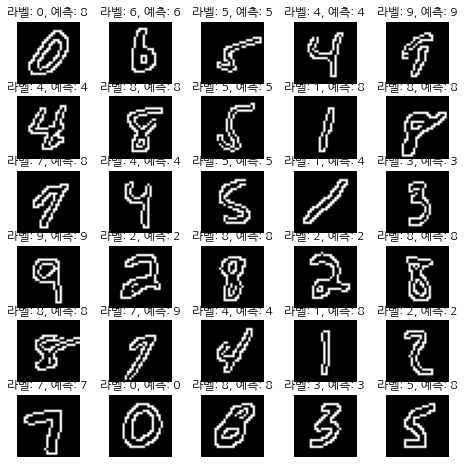

In [36]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'canny')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: original, test: contrav

In [23]:
test_model(dataloaders_contrav[2], model_original, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(3.646192122416891, 0.28)

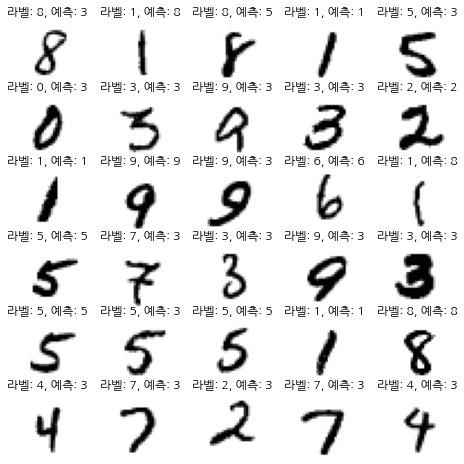

In [37]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'contraversion')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_original(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: canny, test: original

In [24]:
test_model(dataloaders_original[2], model_canny, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(0.16338637430861497, 0.9508)

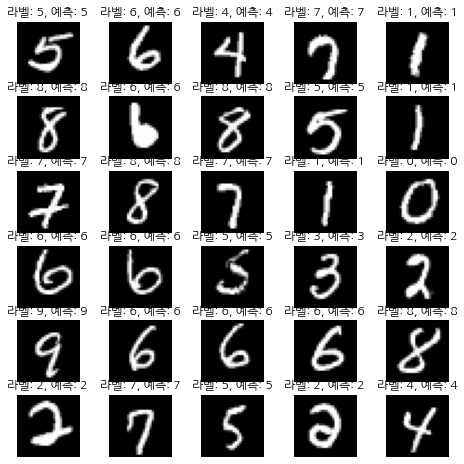

In [38]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: canny, test: contraversion

In [25]:
test_model(dataloaders_contrav[2], model_canny, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(1.479538626731581, 0.4847)

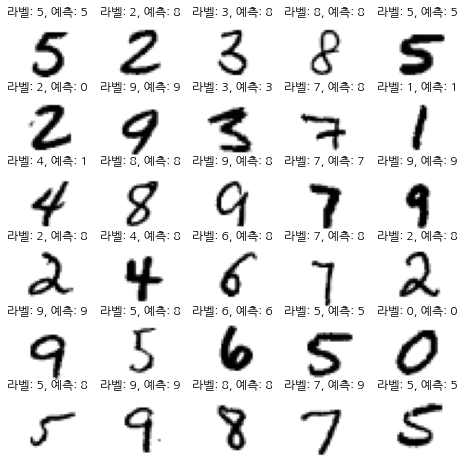

In [39]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'contraversion')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_canny(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: contrav, test:original

In [26]:
test_model(dataloaders_original[2], model_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(1.7898514984519618, 0.5411)

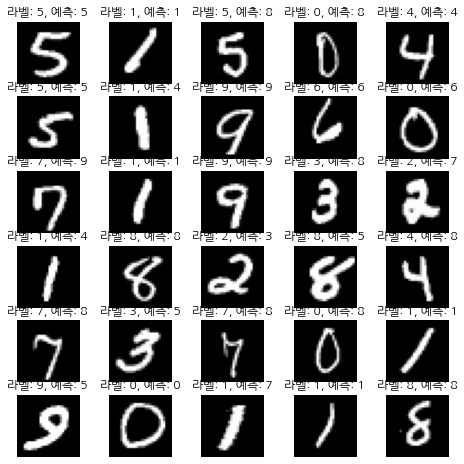

In [41]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=test
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

## tr: contrav, test: canny

In [28]:
test_model(dataloaders_canny[2], model_contrav, loss_fn, device)

1번째 step

2번째 step

3번째 step

4번째 step

5번째 step

6번째 step

7번째 step

8번째 step

9번째 step

10번째 step

11번째 step

12번째 step

13번째 step

14번째 step

15번째 step

16번째 step

17번째 step

18번째 step

19번째 step

20번째 step

21번째 step

22번째 step

23번째 step

24번째 step

25번째 step

26번째 step

27번째 step

28번째 step

29번째 step

30번째 step

31번째 step

32번째 step

33번째 step

34번째 step

35번째 step

36번째 step

37번째 step

38번째 step

39번째 step

40번째 step

41번째 step

42번째 step

43번째 step

44번째 step

45번째 step

46번째 step

47번째 step

48번째 step

49번째 step

50번째 step

51번째 step

52번째 step

53번째 step

54번째 step

55번째 step

56번째 step

57번째 step

58번째 step

59번째 step

60번째 step

61번째 step

62번째 step

63번째 step

64번째 step

65번째 step

66번째 step

67번째 step

68번째 step

69번째 step

70번째 step

71번째 step

72번째 step

73번째 step

74번째 step

75번째 step

76번째 step

77번째 step

78번째 step

79번째 step

80번째 step

81번째 step

82번째 step

83번째 step

84번째 step

85번째 step

86번째 step

87번째 step

88번째 step

89번째 step

90번째 step

91번째 step

92번째 ste

(5.137965184108467, 0.1612)

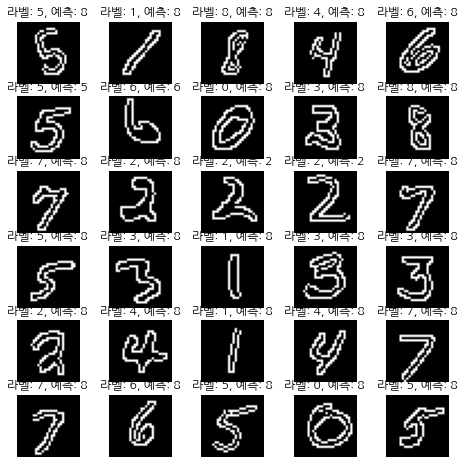

In [40]:
fig = plt.figure(figsize=(8, 8))
cols, rows = 5,6
data=CustomDataset(test,'canny')
samples_idx=random.sample(range(len(data)),30)
for i in range(0, cols * rows):
    idx=samples_idx[i]
    img,label=data[idx]
    fig.add_subplot(rows, cols, i+1)
    output=model_contrav(data[idx][0].unsqueeze(0).to(device))
    plt.title("라벨: "+str(label)+", 예측: {}".format(output.argmax().item()) )
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()